# 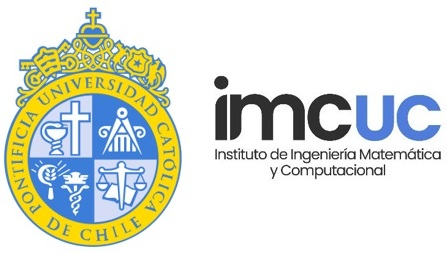  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 05: Limpieza de datos</center></h1>

Esta actividad busca aplicar los conocimientos en transformación de datos para contestar algunas preguntas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 05". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.</b>

## Actividad

Para esta actividad usaremos una base de datos obtenida de AirBnb que hemos bajado para usted. La base está dispobible en la carpeta `data` y el archivo se llama `listings.csv`.

## Rúbrica

- Si han logrado los puntos 1 y 2: 3.0
- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 5: 5.0
- Si han logrado todo: 7.0

In [2]:
# librerías necesarias para el ejercicio
import pandas as pd

## 1. Limpieza - datos relevantes

A continuación use las celdas para leer y transformar en un único DataFrame los datos que están en el archivo `listings.csv`.

Lea el archivo y liste sus columnas.

In [3]:
df = pd.read_csv("data/listings.csv")
df.columns.unique()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

Para este trabajo, estaremos interesados sólo en las siguientes columnas:

['id',	'last_scraped',	'name',	'summary',	'description', 'city', 'state', 'country_code',	'latitude',	'longitude',	'room_type',	'accommodates',	'bathrooms',	'bedrooms',	'price',	'cleaning_fee', 'review_scores_rating',	'cancellation_policy']

Limpie los datos crudos para crear un DataFrame que sólo contenga estas columnas de información.

In [4]:
df = df[['id',	'last_scraped',	'name',	'summary',	'description',
        'city', 'state', 'country_code',	'latitude',	'longitude',
        'room_type',	'accommodates',	'bathrooms',	'bedrooms',	'price',	
        'cleaning_fee', 'review_scores_rating',	'cancellation_policy']]
df

,id,last_scraped,name,summary,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
0,14576,2020-06-22,Dp Valen Castillo 1600,NaN,Nice Flat in 11th floor in front of Mountains ...,Santiago,Chile,CL,-33.46413,-70.64869,Entire home/apt,3,NaN,NaN,"$81,730.00",NaN,NaN,moderate
1,30950,2020-06-22,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...","Located in the heart of Providencia, near by r...",Santiago,Región Metropolitana,CL,-33.43174,-70.61845,Entire home/apt,2,1.0,1.0,"$19,615.00","$60,000.00",90.0,flexible
2,47936,2020-06-22,My Flat in English,NaN,Nice and comfortable! (Website hidden by Airbnb),Santiago,Región Metropolitana,CL,-33.44791,-70.63547,Private room,1,NaN,1.0,"$44,952.00",NaN,NaN,flexible
3,49392,2020-06-22,Share my Flat in Providencia,NaN,Departamento en el barrio Providencia. Complet...,Santiago,Región Metropolitana,CL,-33.43266,-70.60072,Private room,1,NaN,1.0,"$44,952.00","$16,346.00",NaN,moderate
4,50466,2020-06-21,Great apartment at a great location,NaN,Fully furnished LCD TV Wi-fi internet access A...,Santiago,Región Metropolitana,CL,-33.43630,-70.65390,Entire home/apt,2,NaN,1.0,"$69,471.00",NaN,NaN,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15979,43860335,2020-06-21,Apartamento en alquiler diario,NaN,NaN,Providencia,Región Metropolitana,CL,-33.43376,-70.64090,Entire home/apt,3,1.0,1.0,"$30,240.00",NaN,NaN,flexible
15980,43861654,2020-06-21,Arriendo pieza individual amoblada,"Departamento antiguo en Barrio Bellas Artes, c...","Departamento antiguo en Barrio Bellas Artes, c...",Santiago,Región Metropolitana,CL,-33.43381,-70.64589,Private room,1,1.5,1.0,"$11,442.00",NaN,NaN,flexible
15981,43861702,2020-06-26,Casa compartida,NaN,NaN,Las Condes,Región Metropolitana,CL,-33.41197,-70.54748,Private room,4,1.0,2.0,"$22,014.00",NaN,NaN,flexible
15982,43861718,2020-06-21,Plaza de Armas 742,Lindo departamento Ubicado en zona céntrica de...,Lindo departamento Ubicado en zona céntrica de...,Santiago,Región Metropolitana,CL,-33.43916,-70.65093,Entire home/apt,4,1.0,0.0,"$34,327.00","$7,000.00",NaN,strict_14_with_grace_period


## 2. Limpieza - datos duplicados

Ahora asegure que en las filas de su DataFrame no existan datos duplicados. En caso de existir datos duplicados, dejar la primera aparición de los datos en el CSV como dato final. ¿Cuántos datos duplicados encontró?

In [5]:
df.duplicated().sum()

14

Respuesta: Se encontraron 14 datos repetidos.

## 3. Limpieza de texto y transformación

En la columna `price` está como texto el precio de cada una de las publicaciones. Corrija esos datos para contestar: ¿Cuál es el precio promedio de arriendos de AirBnb en esta base de datos?

In [9]:
df["price"] = df["price"].str.replace("$", "")
df["price"] = df["price"].str.replace(",", "")
df["price"] = df["price"].astype(float)

In [14]:
round(df["price"].mean())

91025

El precio promedio para las habitaciones es de 91025 pesos chilenos. 🤓👆

## 4. Variables categóricas

La variable `cancellation_policy` corresponde a una variable categórica. Identifique qué categorías tiene esta columna.

In [16]:

df["cancellation_policy"].unique()

array(['moderate', 'flexible', 'strict_14_with_grace_period',
       'super_strict_60', 'super_strict_30'], dtype=object)

'moderate', 'flexible', 'strict_14_with_grace_period', 'super_strict_60', 'super_strict_30' se encuentran en la columna

## 5. Cambios de categoría

Para nuetro análisis, sólo trabajaremos con las siguientes categorías: `moderate`,`flexible`,`strict`. Transforme la columna `cancellation_policy` para que se adapte a sólo estos tres posibles valores. Si cree que no es obvia la transformación, explique cómo decisió mapear cada categoría original a las categorías finales. Verifique que el DataFrame final sólo tiene esas categorías y conteste: ¿Cuántas publicaciones tenían una categoría `flexible`?

In [31]:
df_cp = df.loc[(df["cancellation_policy"] == "flexible") | 
       (df["cancellation_policy"] == "moderate") | 
       (df["cancellation_policy"] == "strict")]
df_cp

,id,last_scraped,name,summary,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
0,14576,2020-06-22,Dp Valen Castillo 1600,NaN,Nice Flat in 11th floor in front of Mountains ...,Santiago,Chile,CL,-33.46413,-70.64869,Entire home/apt,3,NaN,NaN,81730.0,NaN,NaN,moderate
1,30950,2020-06-22,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...","Located in the heart of Providencia, near by r...",Santiago,Región Metropolitana,CL,-33.43174,-70.61845,Entire home/apt,2,1.0,1.0,19615.0,"$60,000.00",90.0,flexible
2,47936,2020-06-22,My Flat in English,NaN,Nice and comfortable! (Website hidden by Airbnb),Santiago,Región Metropolitana,CL,-33.44791,-70.63547,Private room,1,NaN,1.0,44952.0,NaN,NaN,flexible
3,49392,2020-06-22,Share my Flat in Providencia,NaN,Departamento en el barrio Providencia. Complet...,Santiago,Región Metropolitana,CL,-33.43266,-70.60072,Private room,1,NaN,1.0,44952.0,"$16,346.00",NaN,moderate
4,50466,2020-06-21,Great apartment at a great location,NaN,Fully furnished LCD TV Wi-fi internet access A...,Santiago,Región Metropolitana,CL,-33.43630,-70.65390,Entire home/apt,2,NaN,1.0,69471.0,NaN,NaN,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15978,43858308,2020-06-22,Acogedor departamento 1D-1B en Las Condes,Acogedor departamento 1D-1B con excelente ubic...,Acogedor departamento 1D-1B con excelente ubic...,Las Condes,Región Metropolitana,CL,-33.41086,-70.58829,Entire home/apt,2,1.0,1.0,429900.0,NaN,NaN,flexible
15979,43860335,2020-06-21,Apartamento en alquiler diario,NaN,NaN,Providencia,Región Metropolitana,CL,-33.43376,-70.64090,Entire home/apt,3,1.0,1.0,30240.0,NaN,NaN,flexible
15980,43861654,2020-06-21,Arriendo pieza individual amoblada,"Departamento antiguo en Barrio Bellas Artes, c...","Departamento antiguo en Barrio Bellas Artes, c...",Santiago,Región Metropolitana,CL,-33.43381,-70.64589,Private room,1,1.5,1.0,11442.0,NaN,NaN,flexible
15981,43861702,2020-06-26,Casa compartida,NaN,NaN,Las Condes,Región Metropolitana,CL,-33.41197,-70.54748,Private room,4,1.0,2.0,22014.0,NaN,NaN,flexible


In [34]:
df_cp[df_cp["cancellation_policy"] == "flexible"]["cancellation_policy"].count()

10249

Existen 10249 publicaciones con la categoría flexible. 🤓👆

## 6. Valores fuera de rango

Muchas veces las variables pueden tener valores furea de rango. Revise los datos de la columna `bedrooms`. ¿Encuentra que los valores están todos en un rango razonable? Si no lo están, revise el dato y verifique si hace sentido o no.

In [36]:
# Habitaciones con 0 habitaciones
df[df["bedrooms"].min() == df["bedrooms"]]

,id,last_scraped,name,summary,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
439,2419113,2020-06-22,Departamento para 2 personas,"Estudio amoblado , cama matrimonial , baño pri...","Estudio amoblado , cama matrimonial , baño pri...",Santiago,Región Metropolitana de Santiago de Chile,CL,-33.43967,-70.65694,Entire home/apt,2,1.0,0.0,40865.0,NaN,85.0,strict_14_with_grace_period
506,2837601,2020-06-23,"el colorado, edificio monteblanco","Excelente recién remodelado, tipo loft con 2 a...","Excelente recién remodelado, tipo loft con 2 a...",Santiago,Región Metropolitana,CL,-33.34531,-70.29464,Entire home/apt,4,1.0,0.0,163438.0,"$24,516.00",85.0,strict_14_with_grace_period
511,2882770,2020-06-22,Apto. Studio Santiago Centro,Excelente ubicación del apartamento tipo Studi...,Excelente ubicación del apartamento tipo Studi...,Santiago,Región Metropolitana,CL,-33.44078,-70.65774,Entire home/apt,2,1.0,0.0,49038.0,NaN,NaN,flexible
567,3267803,2020-06-25,Departamento Estudio 1203,HERMOSO APARTAMENTO ESTUDIO AMOBLADO Y EQUIPAD...,HERMOSO APARTAMENTO ESTUDIO AMOBLADO Y EQUIPAD...,Santiago,Región Metropolitana,CL,-33.42568,-70.61553,Entire home/apt,2,1.0,0.0,33606.0,$0.00,91.0,flexible
573,3330669,2020-06-21,Downtown Santiago 2B/2B Modern Flat,"Whether you are a couple, a family, a group of...","Whether you are a couple, a family, a group of...",Santiago,Santiago Metropolitan Region,CL,-33.45110,-70.65566,Entire home/apt,4,0.0,0.0,38413.0,"$12,260.00",81.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15918,43569457,2020-06-22,HABITACION PRIVADA 1 baño privado,NaN,NaN,Santiago,Región Metropolitana,CL,-33.43969,-70.65204,Private room,6,1.0,0.0,22884.0,"$8,000.00",NaN,flexible
15921,43579692,2020-06-22,habitación Privada 1 baño privado,NaN,NaN,Santiago,Región Metropolitana,CL,-33.43889,-70.65055,Private room,2,0.5,0.0,17163.0,"$4,000.00",NaN,strict_14_with_grace_period
15926,43588797,2020-06-26,Habitacion y baño privado Parque Araucano / ex...,NaN,NaN,Las Condes,Región Metropolitana,CL,-33.40461,-70.57301,Private room,1,1.0,0.0,14676.0,NaN,NaN,flexible
15970,43834779,2020-06-21,Plaza de Armas 743,Lindo departamento Ubicado en zona céntrica de...,Lindo departamento Ubicado en zona céntrica de...,Santiago,Región Metropolitana,CL,-33.43899,-70.65068,Entire home/apt,2,1.0,0.0,27788.0,"$7,000.00",NaN,strict_14_with_grace_period


El DF anterior representa los valores en donde las habitaciones son 0, y notemos que a simple vista no sentido, ya que un arriendo al menos deberia tener 1 habitacion. Sin embargo, al analizar "Entire home/apt", notemos que se pueden tratar de estudios u oficinas que no tienen habitaciones, por lo que no es un dato erroneo.

In [37]:
df[df["bedrooms"].max() == df["bedrooms"]]

,id,last_scraped,name,summary,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
15878,43389813,2020-06-22,"Hotel Brasilia, La capital del barrio Brasil",El Hotel Brasilia se encuentra a 5 km del Pati...,El Hotel Brasilia se encuentra a 5 km del Pati...,Santiago,Región Metropolitana,CL,-33.43831,-70.66847,Private room,2,50.0,50.0,67836.0,NaN,NaN,flexible


El DF anterior representa el caso donde existen 50 habitaciones, a simple vista notamos que no tiene sentido, pero al analizar el DF, notamos que se trata de un hotel, por lo que el dato es correcto.

In [39]:
df["bedrooms"].describe()

count    15951.000000
mean         1.371325
std          1.107049
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

Ademas si analizamos los datos de las habitaciones notemos que los valores estan principalmente entre 1 y 2, por lo que los datos son correctos. Sin embargo, existen los casos extremos donde se arriendan 0 o 50 habitaciones, pero como se menciono anteriormente, estos datos son correctos o tienen sentido al analizar el DF.